### Лабораторная работа №9 "Численное решение дифференциальных уравнений"

#### Задание №1
Дано уравнение 
$$\varepsilon\frac{ds}{dt}+s=0,$$     $$t\in[0,1],$$     $$s(0)=1,$$    $$\varepsilon\ll1.$$

Необходимо найти:
1. Точное решение уравнения;
2. Построить график точного решения при $\varepsilon=0.1$ и $\varepsilon=0.01$;
3. Численно решить методом Эйлера уравнение для $\varepsilon=0.01$ с шагом $\Delta t=0.02$ и шагом $\Delta t=0.002$;
4. Построить графики для численных решений.

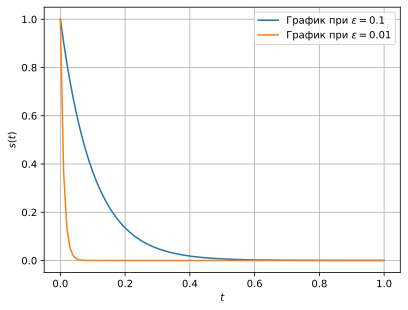

In [1]:
# Пример вывода 2х графиков на одном рисунке
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline 
#графики встраиваются в блокнот;
%config InlineBackend.figure_format = 'svg' #векторный формат #векторный формат

def some_foo(t, e):
    # аналитическое решение
    return np.exp(-t/e)

e1 = 0.1
e2 = 0.01

t = np.linspace(0, 1, 100)
s = some_foo(t, e1)
plt.plot(t, s, label='График при $\epsilon = 0.1$')

s2 = some_foo(t, e2)
plt.plot(t, s2, label='График при $\epsilon = 0.01$')

plt.grid(True)
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$s(t)$')
plt.show()

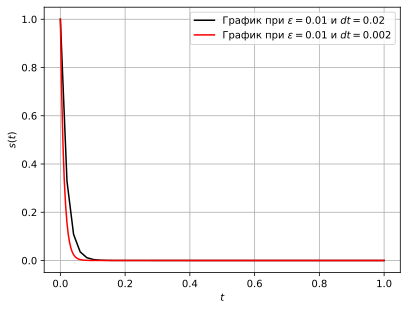

In [2]:
def euler_solve(t0, t1, y0, e, n):
    t, h = np.linspace(t0, t1, n, retstep=True)
    s = [y0]
    s_n = y0
    for i in t[1:]:
        s_n_1 = s_n/(1+h/e)
        s.append(s_n_1)
        s_n = s_n_1
    return t, s

t0 = 0
t1 = 1
y0 = 1
e = 0.01
dt_1 = 0.02
dt_2 = 0.002
n1 = int((t1-t0)/dt_1)
n2 = int((t1-t0)/dt_2)

t_1, s_1 = euler_solve(t0, t1, y0, e, n1)
plt.plot(t_1, s_1, label=f'График при $\epsilon = {e}$ и $dt = {dt_1}$', color='black')

t_2, s_2 = euler_solve(t0, t1, y0, e, n2)
plt.plot(t_2, s_2, label=f'График при $\epsilon = {e}$ и $dt = {dt_2}$', color='red')

plt.grid(True)
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$s(t)$')
plt.show()

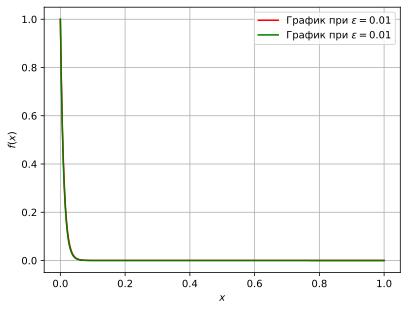

In [3]:
# Сравнение нормальных решений
e = 0.01
n = 1000

t_eu, s_eu = euler_solve(t0, t1, y0, e, n)
plt.plot(t_eu, s_eu, label=f'График при $\epsilon = {e}$', color = 'red')

t = np.linspace(0, 1, n)
s = some_foo(t, e)
plt.plot(t, s, label=f'График при $\epsilon = {e}$', color = 'green')

plt.grid(True)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

In [4]:
# Оценка ошибки аппроксимации

#### Задание №2
1. Разобраться с примером (данным ниже) динамики материальной точки в поле силы тяжести и с сопротивлением при движении (брошенный мяч). Система интегрируется методом Эйлера.
2. Изменить и дополнить пример наличием силы тяги (с произвольным профилем, задается студентом).
4. Решить систему ОДУ при помощи модуля scipy.integrate.ode (см. [официальную справку](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html) ). Изучить метод интегрирования, который реализован в библиотеке. В качестве момента остановки интегрирования взять момент "пдаения" мяча на "землю".
5. Построить график получившийся траектории.
6. Построить профиль тяги (от времени).

In [5]:
import numpy as np
from math import * #импортируем все функции

#константы для вычислений

#для перевода радиан в градусы
grad = pi/180 

g = 9.81 # -_-

# плотность выоздуха
ro = 1.240 

#скорость звука
a = 340

#закон сопротивления
def C_x(M):
    return 0.44

\begin{equation*}
\overrightarrow{Y} = 
\begin{pmatrix}
Y[0] \\
Y[1]\\
Y[2]\\
Y[3]
\end{pmatrix} 
 = 
\begin{pmatrix}
x \\
y \\
V_x \\
V_y
\end{pmatrix}
\end{equation*}


\begin{equation*}
\frac{d\overrightarrow{Y}}{dt} = \overrightarrow{f}(t,\overrightarrow{Y}) =
\begin{pmatrix}
f[0] \\
f[1] \\
f[2] \\
f[3]
\end{pmatrix} 
=
\begin{pmatrix}
\frac{dY[0]}{dt}\\
\frac{dY[1]}{dt}\\
\frac{dY[1]}{dt}\\
\frac{dY[1]}{dt}
\end{pmatrix}
=
\begin{pmatrix}
V_x \\
V_y \\
\frac{dV_x}{dt} \\
\frac{dV_y}{dt}
\end{pmatrix}
\end{equation*}

In [211]:
#начальное положение м.т.
x_0 = 0 
y_0 = 0

#начальная скорость
V_0 = 100

#начальнчй угол
thetta_0 = 30

#масса
mass = 30

#площадь миделя
S_m = pi*0.1**2/4

#тяга
def P(t):
    return (0, 0)

# Н.У
Y_0 = np.array([
    x_0,
    y_0,
    V_0*cos(thetta_0*grad),
    V_0*sin(thetta_0*grad)
])

In [213]:
def f(t,Y):
    x = Y[0]
    y = Y[1]
    V_x = Y[2]
    V_y = Y[3]

    P_x, P_y = P(t)    
    
    thetta = np.arctan(V_y/V_x)
    v = np.sqrt(V_x**2 + V_y**2)
    M = v/a
    F = ro*v**2/2 * S_m * C_x(M)
    N = mass*g
    a_x = (-F * np.cos(thetta) + P_x) / mass
    a_y = (-F * np.sin(thetta) + P_y - N) / mass
    
    return np.array([
        V_x,
        V_y,
        a_x,
        a_y
    ])

In [189]:
# переписать функцию под требования
def euler(t_0, t_1, y_0, dYdt, n_points):
    
    t, h = np.linspace(t_0, t_1, n_points, retstep=True)
    s = [y_0]
    s_n = y_0
    
    for i in t[1:]:
        s_n_1 = s_n + dYdt(i, s_n)*h
        s.append(s_n_1)
        s_n = s_n_1
        
    return s, t

In [191]:
import matplotlib.pyplot as plt
%matplotlib inline 
#графики встраиваются в блокнот;
%config InlineBackend.figure_format = 'svg' #векторный формат #векторный формат

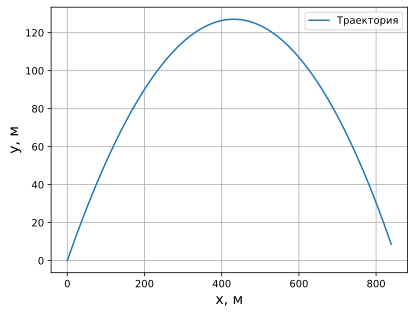

In [193]:
y,t = euler(0, 10, Y_0, f, 100)
y = np.array(y)
xs = y[:,0]
ys = y[:,1]
plt.plot(xs, ys, label='Траектория');
plt.grid()
plt.xlabel('x, м', fontsize=14)
plt.ylabel('y, м', fontsize=14)
plt.legend(loc='best');

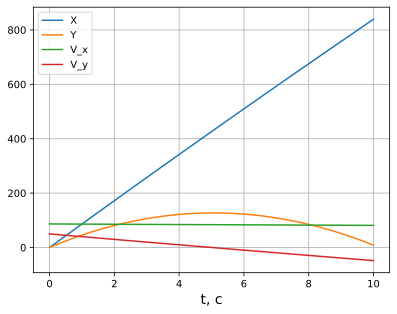

In [195]:
ts = t
xs = y[:,0]
ys = y[:,1]
Vxs = y[:,2]
Vys = y[:,3]

plt.plot(ts, xs, label='X');
plt.plot(ts, ys, label='Y');
plt.plot(ts, Vxs, label='V_x');
plt.plot(ts, Vys, label='V_y');

plt.grid() # сетка
plt.xlabel('t, c', fontsize=14)
plt.legend(loc='best')
plt.show()

In [196]:
# Используем SciPy

In [239]:
from scipy import integrate as integ

t0 = 0
t1 = 50
n = 1000

ODE = integ.ode(f)
ODE.set_integrator('dopri5')
ODE.set_initial_value(Y_0,t0)

t = np.linspace(t0,t1,n)
Y = []
Y.append(Y_0)
i = 0
y_current = Y_0[1]


while y_current >= -1e-8 and t[i] <= t1:
    ODE.integrate(t[i])
    y_solve = ODE.y
    Y.append(y_solve)
    y_current = y_solve[1]
    i += 1

Y = np.array(Y)

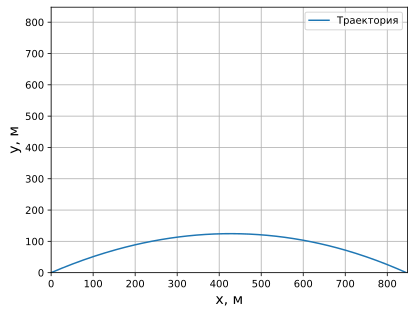

In [241]:
xs = Y[:,0]
ys = Y[:,1]
max_x = xs.max()
max_y = ys.max()
L = max(max_x, max_y)
plt.plot(xs, ys, label='Траектория')
plt.grid() # сетка
plt.xlim(0, L)
plt.ylim(0, L)
plt.xlabel('x, м', fontsize=14)
plt.ylabel('y, м', fontsize=14)
plt.legend(loc='best')

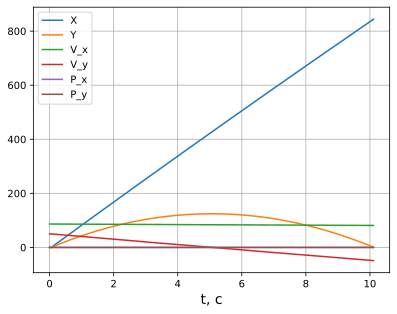

In [231]:
ts = t[:i]
xs = Y[:-1,0]
ys = Y[:-1,1]
Vxs = Y[:-1,2]
Vys = Y[:-1,3]

Pxs = np.array([P(ti)[0] for ti in ts])
Pys = np.array([P(ti)[1] for ti in ts])

plt.plot(ts, xs, label='X');
plt.plot(ts, ys, label='Y');
plt.plot(ts, Vxs, label='V_x');
plt.plot(ts, Vys, label='V_y');
plt.plot(ts, Pxs, label='P_x')
plt.plot(ts, Pys, label='P_y')

plt.grid() # сетка
plt.xlabel('t, c', fontsize=14)
plt.legend(loc='best')
plt.show()

In [253]:
from scipy import integrate as integ

t0 = 0
t1 = 50
n = 1000

def P(t):
    if t < 10:
        return (500, 500)
    return (0, 0)
    
ODE = integ.ode(f)
ODE.set_integrator('dopri5')
ODE.set_initial_value(Y_0,t0)

t = np.linspace(t0,t1,n)
Y = []
Y.append(Y_0)
i = 0
y_current = Y_0[1]


while y_current >= -1e-8 and t[i] <= t1:
    ODE.integrate(t[i])
    y_solve = ODE.y
    Y.append(y_solve)
    y_current = y_solve[1]
    i += 1
    
Y = np.array(Y)
    

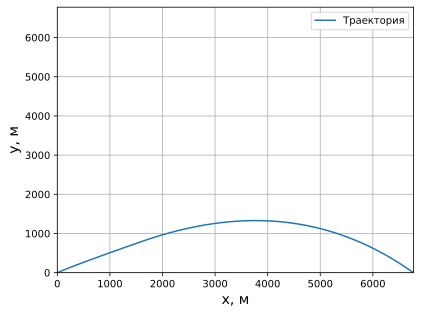

In [255]:
xs = Y[:,0]
ys = Y[:,1]
max_x = xs.max()
max_y = ys.max()
L = max(max_x, max_y)
plt.plot(xs, ys, label='Траектория')
plt.grid() # сетка
plt.xlim(0, L)
plt.ylim(0, L)
plt.xlabel('x, м', fontsize=14)
plt.ylabel('y, м', fontsize=14)
plt.legend(loc='best')

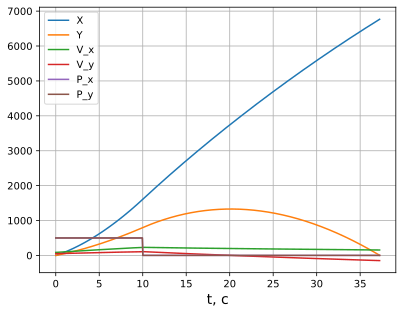

In [257]:
ts = t[:i]
xs = Y[:-1,0]
ys = Y[:-1,1]
Vxs = Y[:-1,2]
Vys = Y[:-1,3]

Pxs = np.array([P(ti)[0] for ti in ts])
Pys = np.array([P(ti)[1] for ti in ts])

plt.plot(ts, xs, label='X');
plt.plot(ts, ys, label='Y');
plt.plot(ts, Vxs, label='V_x');
plt.plot(ts, Vys, label='V_y');
plt.plot(ts, Pxs, label='P_x')
plt.plot(ts, Pys, label='P_y')

plt.grid() # сетка
plt.xlabel('t, c', fontsize=14)
plt.legend(loc='best')
plt.show()